# IMPORTING IMAGES......

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import PIL
import os
import cv2
import matplotlib.pyplot as plt
import pathlib

In [4]:
cell_image_path = './/cell_images'

window_path = pathlib.Path(cell_image_path)
window_path

WindowsPath('cell_images')

In [5]:
dataset_path = list(window_path.glob('*/*.png'))
print ('Lenght of image dataset ======> ', len(dataset_path))

# accesssing individual folders 
parasitize_folder = list(window_path.glob('Parasitized/*.png'))
uninfected_folder = list(window_path.glob('Uninfected/*.png'))

Lenght of image dataset ======>  27558


In [6]:
# create a diction of label and images set 

cell_image_dictionary = {
    'parasitized':parasitize_folder, 
    'uniffected':uninfected_folder
}

cell_image_label = {
    'parasitized':0,
    'uniffected':1
}


(124, 154, 3)


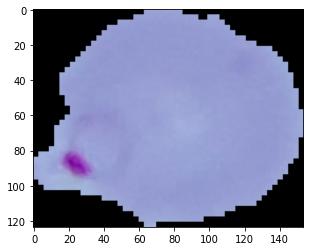

In [7]:
# GETTING A SINGLE SAMPLE IMAGE FIRST

image = cv2.imread(str(cell_image_dictionary['parasitized'][7]))
print(image.shape)
plt.imshow(image)

In [8]:
# USING THE DICTIONARY CREATED ABOVE TO LOAD THE ENTIRE IMAGE SET 

X = [] # actual images are stored in this variable....
y = [] # labels are stored in this variable...........

for title, paths in cell_image_dictionary.items():
    
    print('Loading Path =============> : ' , title)
    for path in paths:
        image = cv2.imread(str(path))
        X.append(image)
        y.append(cell_image_label[title])

print(f'{len(X)} Images Loaded completely .....................')


Loading Path =============> :  parasitized
Loading Path =============> :  uniffected
27558 Images Loaded completely .....................


# 2. DATA PREPROCESSING.............

In [7]:
# COVERTING IMAGES INTO NUMPY ARRAY FOR EASY OPERATIONS

In [19]:
X = np.array(X)
y = np.array(y)

C:\Users\binary\AppData\Local\Temp\ipykernel_8320\1631289887.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


In [ ]:
# CONVERTING ALL IMAGES TO THE SAME DIMENSION....... (2D ARE NOT OF THE SAME SIZE)
#     NOW LETS COVERT ALL IMAGE TO SIZE 120 BY 120

In [20]:
padded_X = []
for image in X:
    p_image=cv2.resize(image, (64,64))
    padded_X.append(p_image)

print('image resized complete..........')

image resized complete..........


In [26]:
# coverting padded_X to a numpy array and printing first five image of padded_X (re-shaped X)
X_padded = np.array(list(padded_X))
[im.shape for im in X_padded[:5]]

[(64, 64, 3), (64, 64, 3), (64, 64, 3), (64, 64, 3), (64, 64, 3)]

In [ ]:
# SCALLING IMAGE.... TO IMPROVE NORMALIZED DATA

In [ ]:
padded_X = padded_X / 255

In [27]:
# SPLITTING OF DATA INTO TRAINING AS TESTING SET.....

from sklearn import model_selection

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X_padded, y, test_size=.25, random_state=0)

print('x train shape' , xtrain.shape)
print('y train shape' , ytrain.shape)
print('x test shape', xtest.shape)
print('y test shape', ytest.shape)

x train shape (20668, 64, 64, 3)
y train shape (20668,)
x test shape (6890, 64, 64, 3)
y test shape (6890,)


# 1. DATA EXPLORATION (CELL IMAGES)

In [21]:
para_size = len(parasitize_folder)
uninfec_size = len(uninfected_folder)

print('Parasitized Cells ======> ', para_size)
print ('Uninfected Ceslls =====>' , uninfec_size)

Parasitized Cells ======>  13779
Uninfected Ceslls =====> 13779


<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

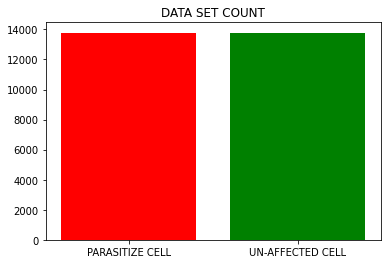

In [22]:
# VISUALIZING DATA COUNT..... 

x_label = ['PARASITIZE CELL' , 'UN-AFFECTED CELL']
y_count = [para_size , uninfec_size]

plt.title('DATA SET COUNT')
plt.bar(x_label, y_count, color=['red', 'green'])
plt.bar

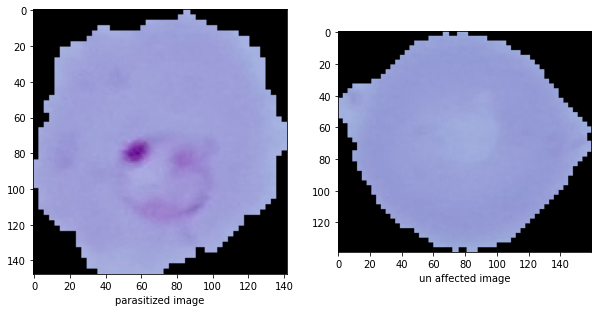

In [23]:
# #  SHOW SAMPLE IMAGE FROM EACH CLASS 
labels = ['parasitized image' , 'un affected image']

#  getting index value of where label is 1 and 0 using it to access image in X numpy array 
affected , nonaffected = np.where(y == 0)[0] , np.where(y == 1)[0]
images = [X[affected[0]] , X[nonaffected[0]]]

plt.figure(figsize=(10,10))
for i in range(2):
    plt.subplot(1,2, i+1)
    plt.imshow(images[i])
    plt.xlabel(labels[i])

plt.show()

# Malaria cell and Non Malaria Cell Sample

In [14]:
# CHECKING FIRST 10 IMAGE DIMENSION 

In [24]:
cell_samples  = X[:5]
print([im.shape for im in cell_samples])

print('\n COMMENT ..... ALL CELLS ARE 3 CHANELS IMAGES BUT OF DIFERENT SECOND DIMENSION (2D)... ')

[(148, 142, 3), (208, 148, 3), (151, 139, 3), (154, 145, 3), (154, 133, 3)]

 COMMENT ..... ALL CELLS ARE 3 CHANELS IMAGES BUT OF DIFERENT SECOND DIMENSION (2D)... 


In [105]:
cell_samples[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

# 3. BUILDING THE CNN MODEL.....

In [28]:
prediction_class = 1

cnn_model = keras.Sequential([
#     keras.layers.Conv2D(filters=64 , kernel_size=(3,3) , padding='same', activation='relu', input_shape=(64,64,3)),
    keras.layers.Conv2D(filters=32 , kernel_size=(3,3) , padding='same', activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(filters=64 , kernel_size=(3,3) , padding='same', activation='relu'),
    keras.layers.MaxPooling2D(), 
    
    keras.layers.Flatten(),
#     keras.layers.Dropout(.50),
    #     keras.layers.Dropout(.50),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(prediction_class, activation='sigmoid')
    
])



cnn_model.compile(
    loss = "binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

# Model Summary

In [29]:
cnn_model.summary()
callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 64)                1

# Training the model

In [177]:
epoch = 7 # i try 2 epoch 15, 5 etc 
cnn_model.fit(xtrain, ytrain, batch_size=64, epochs=epoch, verbose=1 , callbacks=callback)

Epoch 1/7
323/323 [==============================] - 314s 973ms/step - loss: 0.1638 - accuracy: 0.9403
Epoch 2/7
323/323 [==============================] - 333s 1s/step - loss: 0.1267 - accuracy: 0.9544
Epoch 3/7
323/323 [==============================] - 336s 1s/step - loss: 0.1039 - accuracy: 0.9629
Epoch 4/7
323/323 [==============================] - 337s 1s/step - loss: 0.0810 - accuracy: 0.9717
Epoch 5/7
323/323 [==============================] - 336s 1s/step - loss: 0.0667 - accuracy: 0.9761
Epoch 6/7
323/323 [==============================] - 338s 1s/step - loss: 0.0572 - accuracy: 0.9812
Epoch 7/7
323/323 [==============================] - 338s 1s/step - loss: 0.0523 - accuracy: 0.9830


In [178]:
cnn_model.evaluate(xtest, ytest, batch_size=64)

108/108 [==============================] - 46s 429ms/step - loss: 0.3084 - accuracy: 0.9318


[0.3083784580230713, 0.9317851662635803]

# 4. EVALUATE THE MALARIA CELL CLASSIFICATION CCN MODEL

In [33]:
# helper method to convert the continuose value of sigmoid output to discrete (0 and 1)

def continuose_discrete(predict):
    y_pred=[]
    for y in predict:
            if y>=0.5:
                y_pred.append(1)
            else: 
                y_pred.append(0)
                
    y_pred = np.array(y_pred)
    return y_pred


y_predict = cnn_model.predict(xtest)
y_pred = continuose_discrete(y_predict)


# Classfication Report

In [180]:
from sklearn import metrics

class_report = metrics.classification_report(ytest, y_pred)
confuse_matrix = metrics.confusion_matrix(ytest, y_pred)

print('================= CLASSIFICATION REPORT ======================')
print('==============================================================\n')
print(class_report)
print('==============================================================')

================= CLASSIFICATION REPORT ======================

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3394
           1       0.93      0.94      0.93      3496

    accuracy                           0.93      6890
   macro avg       0.93      0.93      0.93      6890
weighted avg       0.93      0.93      0.93      6890



In [ ]:
# VISUALIZING  ROC AND PR CURVE

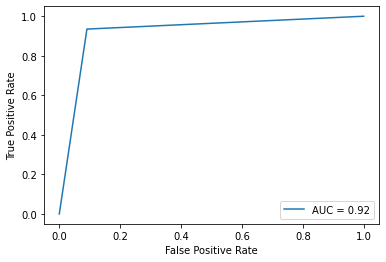

In [35]:
from sklearn import metrics

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
# roc_display.figure_.savefig(f'./out/ROC_curve_for_fold#{fold_no}.jpeg')

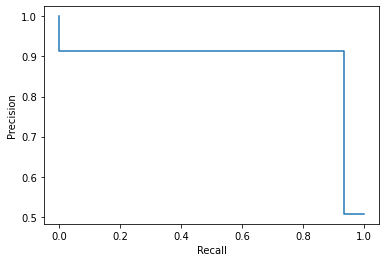

In [38]:
# PR Curve
precision, recall, _ = metrics.precision_recall_curve(ytest, y_pred)
pr_display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall)
# pr_display.title('Recal and Precision')
pr_display.plot()
# pr_display.figure_.savefig(f'./out/PR_curve_for_fold#{fold_no}.jpeg')

# 6. CONFUSION MATRIC FOR RESULT VISUALIAZATION

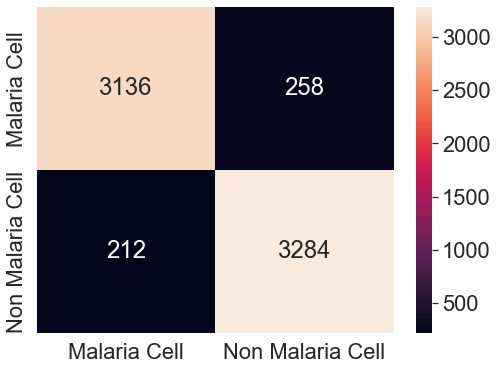

In [181]:
import seaborn as sns
import pandas as pd 

cm_pd = pd.DataFrame(confuse_matrix)
data = np.array([[2,3],[4,5]])

label= ["Malaria Cell" , "Non Malaria Cell"]
plt.figure(figsize=(8,6))
sns.heatmap(cm_pd, annot=True , fmt='d', xticklabels=label , yticklabels=label)
sns.set(font_scale=2)


ModuleNotFoundError: No module named 'ann'

In [183]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

In [2]:
ytest[0:5]

NameError: name 'ytest' is not defined